# On The Interaction of Gravitational Waves with Magnetic and Electric Fields by Barrabes & Hogan
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021 Christmas Day AND Launch of JWST

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.8.1048

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,rho,phi,z,du,drho,dphi,dz = symbols('u rho phi z du drho dphi dz')

In [5]:
k = Function('k')(rho,u)
k

In [6]:
U = Function('U')(rho,u)
U

In [7]:
variables = Matrix( [u,rho,phi,z] )
variables

⎡u⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [du,drho,dphi,dz])
differentials

⎡ du ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = exp(2*(k-U)) * du**2 + (2*exp(2*(k-U))*du*drho)  - exp(2*U) * dz**2 - rho**2 * exp(-2*U)* dphi**2 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ -2⋅U(ρ, u) + 2⋅k(ρ, u)   -2⋅U(ρ, u) + 2⋅k(ρ, u)                              ⎤
⎢ℯ                        ℯ                               0              0     ⎥
⎢                                                                              ⎥
⎢ -2⋅U(ρ, u) + 2⋅k(ρ, u)                                                       ⎥
⎢ℯ                                   0                    0              0     ⎥
⎢                                                                              ⎥
⎢                                                    2  -2⋅U(ρ, u)             ⎥
⎢           0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                              ⎥
⎢                                                                     2⋅U(ρ, u)⎥
⎣           0                        0                    0         -ℯ         ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ -2⋅U(ρ, u) + 2⋅k(ρ, u)   -2⋅U(ρ, u) + 2⋅k(ρ, u)                              ⎤
⎢ℯ                        ℯ                               0              0     ⎥
⎢                                                                              ⎥
⎢ -2⋅U(ρ, u) + 2⋅k(ρ, u)                                                       ⎥
⎢ℯ                                   0                    0              0     ⎥
⎢                                                                              ⎥
⎢                                                    2  -2⋅U(ρ, u)             ⎥
⎢           0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                              ⎥
⎢                                                                     2⋅U(ρ, u)⎥
⎣           0                        0                    0         -ℯ         ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u rho phi z")
u,rho,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                          
⎢⎡∂               ∂             ∂               ∂                                                                          
⎢⎢──(U(ρ, u)) - 2⋅──(U(ρ, u)) - ──(k(ρ, u)) + 2⋅──(k(ρ, u))  0                   0                                   0     
⎢⎢∂ρ              ∂u            ∂ρ              ∂u                                                                         
⎢⎢                                                                                                                         
⎢⎢                            0                              0                   0                                   0     
⎢⎢                                                                                                                         
⎢⎢                                                                ⎛    ∂              ⎞  -2⋅k(ρ, u)                        
⎢⎢      

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2                           2     2                 2                  2          ⎞                                
⎢  ⎜   ∂               ⎛∂          ⎞     ∂                 ∂                  ∂           ⎟   ∂             ∂             ∂
⎢ρ⋅⎜- ───(U(ρ, u)) - 2⋅⎜──(U(ρ, u))⎟  + ───(k(ρ, u)) + 2⋅─────(U(ρ, u)) - 2⋅─────(k(ρ, u))⎟ - ──(U(ρ, u)) + ──(U(ρ, u)) + ─
⎢  ⎜    2              ⎝∂u         ⎠      2              ∂u ∂ρ              ∂u ∂ρ         ⎟   ∂ρ            ∂u            ∂
⎢  ⎝  ∂ρ                                ∂ρ                                                ⎠                                
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                        ρ                                                 
⎢                                                                                                                          
⎢       

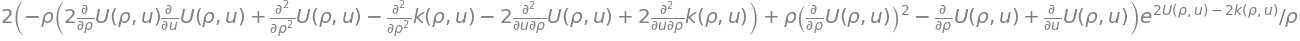

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                                          ∂             ∂                                 
⎢               2                                                  2   1.0⋅──(k(ρ, u))   ──(k(ρ, u))                 2   1.
⎢  ⎛∂          ⎞        ∂           ∂                 ⎛∂          ⎞        ∂ρ            ∂u             ⎛∂          ⎞      
⎢- ⎜──(U(ρ, u))⎟  + 2.0⋅──(U(ρ, u))⋅──(U(ρ, u)) - 2.0⋅⎜──(U(ρ, u))⎟  + ─────────────── - ───────────  - ⎜──(U(ρ, u))⎟  + ──
⎢  ⎝∂ρ         ⎠        ∂ρ          ∂u                ⎝∂u         ⎠           ρ               ρ         ⎝∂ρ         ⎠      
⎢                                                                                                                          
⎢                                                       ∂                                                                  
⎢                                               2   1.0⋅──(k(ρ, u))                                                    2   
⎢       

In [22]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             

In [24]:
simplify(Ric.tensor())

⎡    ⎛  2                           2     2                 2                  2          ⎞                                          
⎢    ⎜ ∂               ⎛∂          ⎞     ∂                 ∂                  ∂           ⎟   ∂             ∂             ∂          
⎢- ρ⋅⎜───(U(ρ, u)) + 2⋅⎜──(U(ρ, u))⎟  - ───(k(ρ, u)) - 2⋅─────(U(ρ, u)) + 2⋅─────(k(ρ, u))⎟ - ──(U(ρ, u)) + ──(U(ρ, u)) + ──(k(ρ, u))
⎢    ⎜  2              ⎝∂u         ⎠      2              ∂u ∂ρ              ∂u ∂ρ         ⎟   ∂ρ            ∂u            ∂ρ         
⎢    ⎝∂ρ                                ∂ρ                                                ⎠                                          
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                        ρ                                                           
⎢                                                             

In [1]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()